# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Muhammad Ashim Izzuddin
- Email: muhammadashimizzuddin@gmail.com
- Id Dicoding: ashim_izzuddin

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
# --- 1.0 Impor Library ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


### Menyiapkan data yang akan diguankan

In [2]:
# --- 1.1 Memuat Data ---

try:
    df = pd.read_csv('data.csv', sep=';')
    print("✅ Dataset berhasil dimuat!")
except FileNotFoundError:
    print("❌ File data.csv tidak ditemukan. Pastikan path file sudah benar.")

✅ Dataset berhasil dimuat!


## Data Understanding

In [3]:
# --- 1.2 Eksplorasi Data Awal ---

if 'df' in locals():
    print("\n### 1.2 Informasi Awal Dataset ###")

    # Menampilkan 5 baris pertama data untuk melihat sampel
    print("\n[INFO] Lima baris pertama data:")
    print(df.head())

    # Menampilkan dimensi data (jumlah baris dan kolom)
    print(f"\n[INFO] Dimensi data: {df.shape[0]} baris dan {df.shape[1]} kolom.")

    # Menampilkan informasi ringkas, termasuk tipe data dan nilai non-null
    print("\n[INFO] Tipe Data dan Nilai Non-Null Awal:")
    df.info()

    # Menampilkan ringkasan statistik untuk kolom numerik
    print("\n[INFO] Statistik Deskriptif (Kolom Numerik):")
    print(df.describe())

    # Menampilkan distribusi untuk kolom target 'Status'
    print("\n[INFO] Distribusi Kolom 'Status':")
    print(df['Status'].value_counts())
    print("\n[INFO] Persentase Distribusi Kolom 'Status':")
    print(df['Status'].value_counts(normalize=True) * 100)


### 1.2 Informasi Awal Dataset ###

[INFO] Lima baris pertama data:
   Marital_status  Application_mode  Application_order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime_evening_attendance  Previous_qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                         122.0            1                     19   
1                         160.0            1     

## Data Preparation / Preprocessing

In [4]:
 # --- 2.1 Standarisasi Nama Kolom ---
print("\n--- 2.1 Menjalankan standarisasi nama kolom ---")
df.columns = df.columns.str.lower().str.replace(' ', '_')
print("✅ Nama kolom berhasil diseragamkan (lowercase dan underscore).")

# --- 2.2 Memperbaiki Tipe Data Kolom ---
print("\n--- 2.2 Memperbaiki tipe data kolom numerik yang terbaca sebagai object ---")
# Daftar kolom yang seharusnya numerik berdasarkan analisis awal
cols_to_numeric = [
    'curricular_units_1st_sem_grade',
    'curricular_units_2nd_sem_grade',
    'admission_grade',
    'unemployment_rate',
    'inflation_rate',
    'gdp'
]

for col in cols_to_numeric:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
print("✅ Tipe data kolom numerik telah diproses.")

# --- 2.3 Menangani Nilai Kosong (Imputation) ---
print("\n--- 2.3 Menangani nilai kosong (NaN) yang muncul setelah perbaikan tipe data ---")
# Cek jumlah nilai NaN yang muncul setelah konversi paksa
print("\n[INFO] Jumlah nilai kosong SEBELUM imputasi:")
print(df[cols_to_numeric].isnull().sum())

# Kolom yang akan diimputasi (hanya yang memiliki NaN)
cols_to_impute = ['curricular_units_1st_sem_grade', 'curricular_units_2nd_sem_grade']

for col in cols_to_impute:
    if col in df.columns:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Nilai kosong di '{col}' diisi dengan median: {median_val}")

print("\n[INFO] Jumlah nilai kosong SETELAH imputasi:")
print(df[cols_to_impute].isnull().sum())
print("✅ Proses imputasi nilai kosong selesai.")

# --- 2.4 Membuat Kolom Target Biner ---
print("\n--- 2.4 Membuat kolom target biner 'output_label' ---")
df['output_label'] = df['status'].apply(lambda x: 1 if x == 'Dropout' else 0)
print("✅ Kolom 'output_label' berhasil dibuat (1: Dropout, 0: Non-Dropout).")
print("\n[INFO] Contoh hasil pemetaan 'status' ke 'output_label':")
print(df[['status', 'output_label']].head())

# --- 2.5 Pemeriksaan Final ---
print("\n--- 2.5 Info Dataframe Final Setelah Persiapan ---")
# Menampilkan informasi ringkas dari dataframe yang sudah bersih untuk verifikasi akhir
df.info()
print("\n\n✅ Tahap 2 Selesai! Data sekarang bersih dan siap untuk dianalisis lebih lanjut.")


--- 2.1 Menjalankan standarisasi nama kolom ---
✅ Nama kolom berhasil diseragamkan (lowercase dan underscore).

--- 2.2 Memperbaiki tipe data kolom numerik yang terbaca sebagai object ---
✅ Tipe data kolom numerik telah diproses.

--- 2.3 Menangani nilai kosong (NaN) yang muncul setelah perbaikan tipe data ---

[INFO] Jumlah nilai kosong SEBELUM imputasi:
curricular_units_1st_sem_grade    0
curricular_units_2nd_sem_grade    0
admission_grade                   0
unemployment_rate                 0
inflation_rate                    0
gdp                               0
dtype: int64
Nilai kosong di 'curricular_units_1st_sem_grade' diisi dengan median: 12.285714285714286
Nilai kosong di 'curricular_units_2nd_sem_grade' diisi dengan median: 12.2

[INFO] Jumlah nilai kosong SETELAH imputasi:
curricular_units_1st_sem_grade    0
curricular_units_2nd_sem_grade    0
dtype: int64
✅ Proses imputasi nilai kosong selesai.

--- 2.4 Membuat kolom target biner 'output_label' ---
✅ Kolom 'output_label'

## Analisis Data Eksploratif (EDA)


--- 3.1 Membandingkan rata-rata fitur numerik berdasarkan status dropout ---
output_label                                            0            1
marital_status                                   1.139527     1.261084
application_mode                                16.282384    23.712878
application_order                                1.791542     1.593244
course                                        8904.441225  8755.629838
daytime_evening_attendance                       0.908092     0.854328
previous_qualification                           4.230769     5.311049
previous_qualification_grade                   133.322744   131.114075
nacionality                                      1.833500     1.957072
mothers_qualification                           18.864802    21.035186
fathers_qualification                           22.082251    22.683322
mothers_occupation                              11.360639    10.116115
fathers_occupation                              11.453879    10.141450

C:\Users\Pongo\AppData\Local\Temp\ipykernel_12048\3242474834.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='status', data=df, palette='viridis')


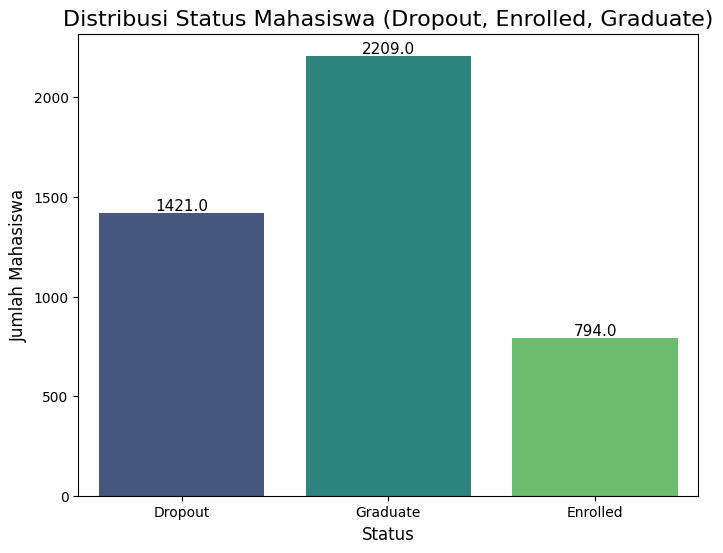

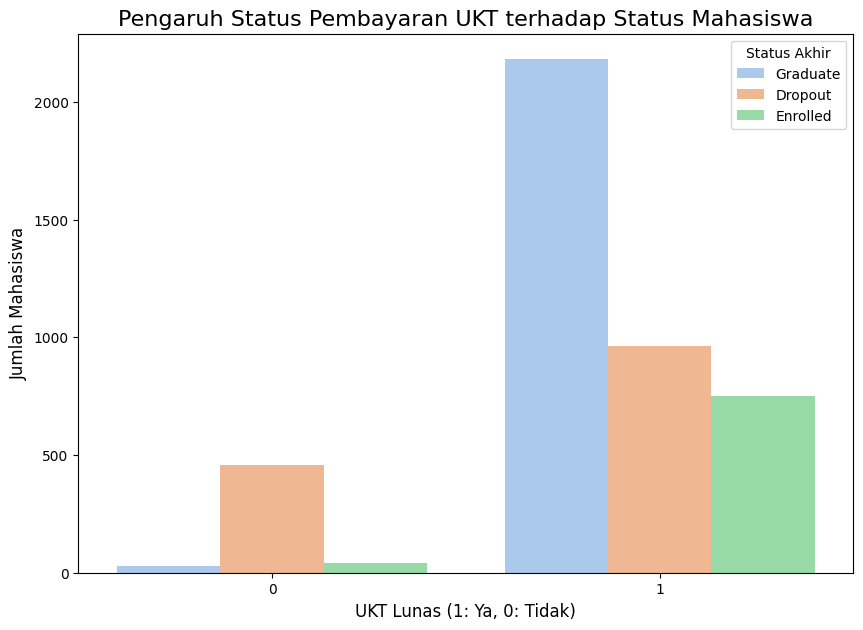

C:\Users\Pongo\AppData\Local\Temp\ipykernel_12048\3242474834.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y='age_at_enrollment', data=df, palette='coolwarm')


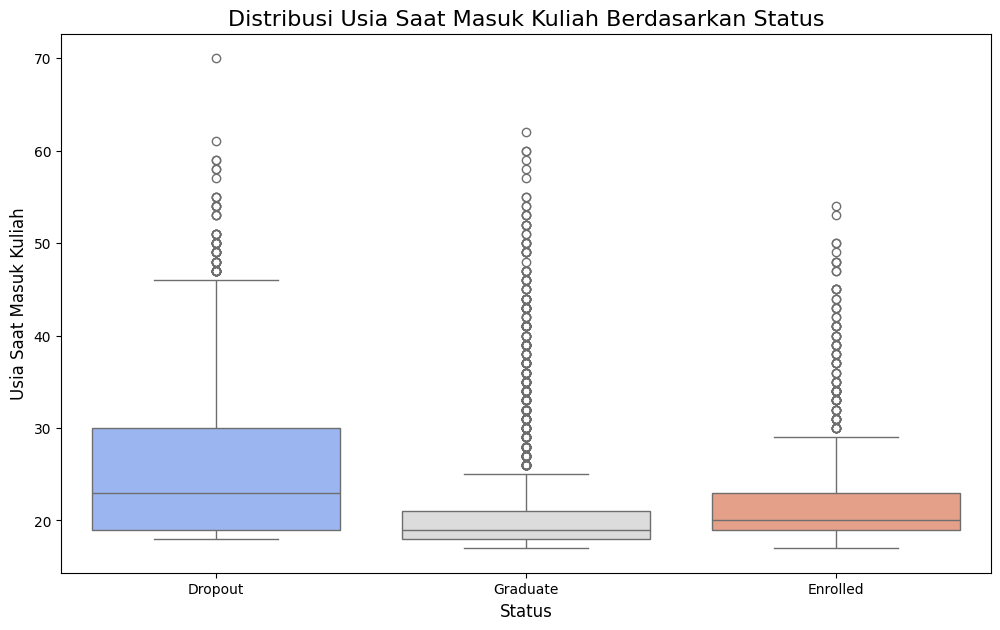


--- 3.3 Heatmap Korelasi Fitur Akademik dan Ekonomi ---


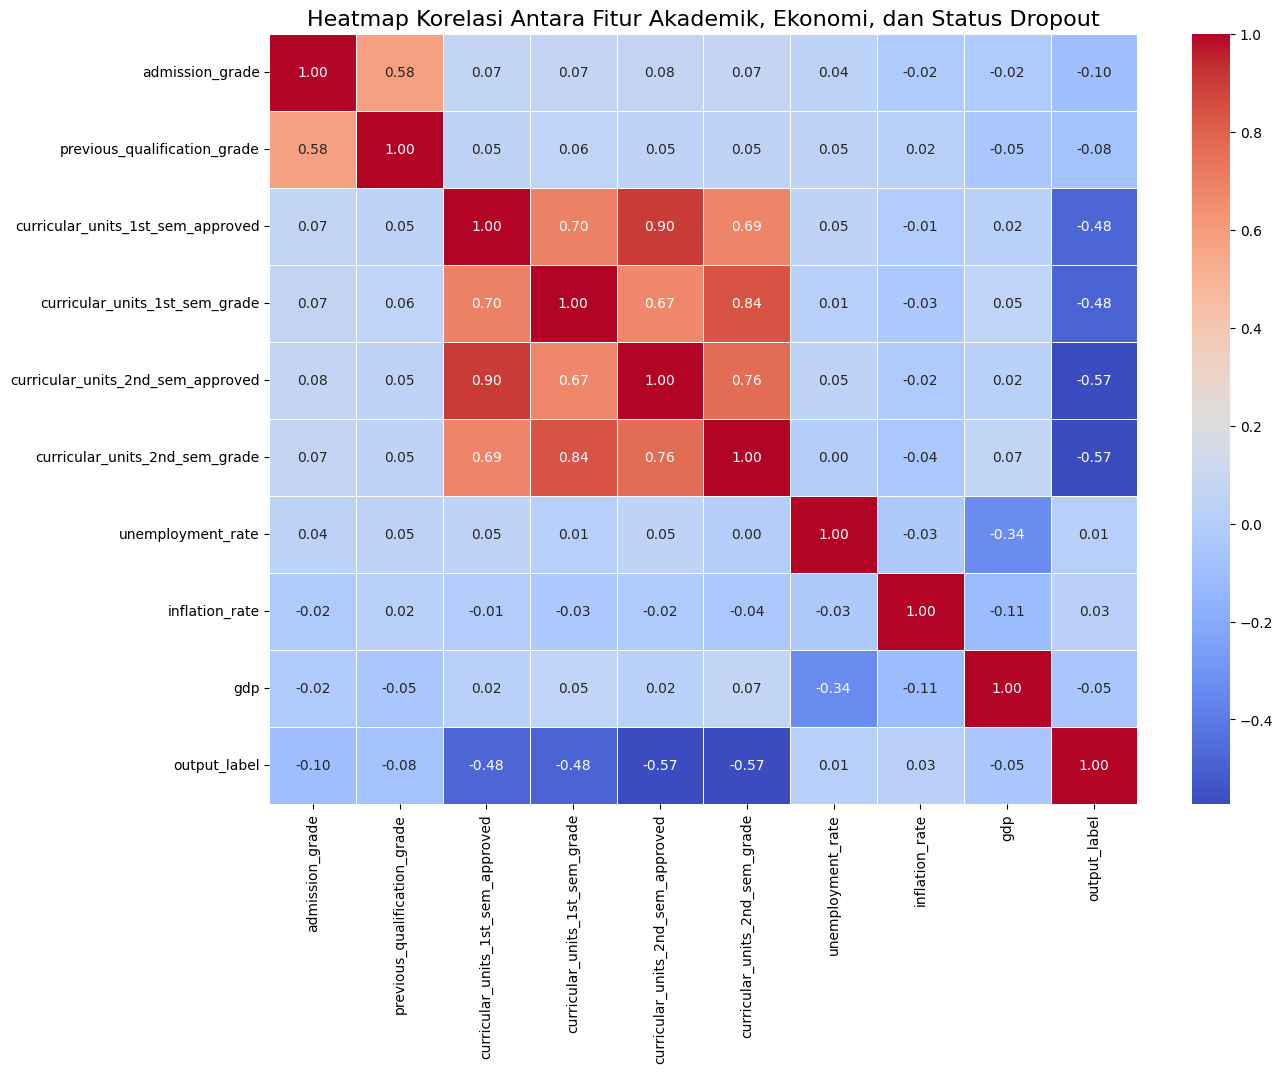


✅ Tahap 3 Selesai: Analisis Data Eksploratif.


In [5]:
# --- 3.1 Ringkasan Numerik Berdasarkan Status Dropout ---
print("\n--- 3.1 Membandingkan rata-rata fitur numerik berdasarkan status dropout ---")
comparison_df = df.groupby('output_label').mean(numeric_only=True).T
print(comparison_df)

# --- 3.2 Visualisasi Data ---
print("\n--- 3.2 Membuat Visualisasi Data ---")

# 1. Distribusi Target Variabel
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='status', data=df, palette='viridis')
plt.title('Distribusi Status Mahasiswa (Dropout, Enrolled, Graduate)', fontsize=16)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Jumlah Mahasiswa', fontsize=12)
# Menambahkan label angka di atas bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

# 2. Pengaruh Status Pembayaran UKT (Tuition Fees)
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='tuition_fees_up_to_date', hue='status', palette='pastel')
plt.title('Pengaruh Status Pembayaran UKT terhadap Status Mahasiswa', fontsize=16)
plt.xlabel('UKT Lunas (1: Ya, 0: Tidak)', fontsize=12)
plt.ylabel('Jumlah Mahasiswa', fontsize=12)
plt.legend(title='Status Akhir')
plt.show()

# 3. Pengaruh Usia Saat Masuk Kuliah
plt.figure(figsize=(12, 7))
sns.boxplot(x='status', y='age_at_enrollment', data=df, palette='coolwarm')
plt.title('Distribusi Usia Saat Masuk Kuliah Berdasarkan Status', fontsize=16)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Usia Saat Masuk Kuliah', fontsize=12)
plt.show()

# 4. Korelasi Antar Fitur Akademik Penting
print("\n--- 3.3 Heatmap Korelasi Fitur Akademik dan Ekonomi ---")
plt.figure(figsize=(14, 10))
# Memilih beberapa fitur yang paling relevan untuk dianalisis korelasinya
academic_features = [
    'admission_grade',
    'previous_qualification_grade',
    'curricular_units_1st_sem_approved',
    'curricular_units_1st_sem_grade',
    'curricular_units_2nd_sem_approved',
    'curricular_units_2nd_sem_grade',
    'unemployment_rate', 'inflation_rate', 'gdp',
    'output_label' # Memasukkan target biner kita
]
correlation_matrix = df[academic_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap Korelasi Antara Fitur Akademik, Ekonomi, dan Status Dropout', fontsize=16)
plt.show()

print("\n✅ Tahap 3 Selesai: Analisis Data Eksploratif.")


## Modeling

### Feature Selection

In [6]:
# Memastikan bahwa 'df' sudah didefinisikan sebelum digunakan
if 'df' in locals():
    # Menghapus kolom 'status' yang asli dan tidak relevan
    X = df.drop(columns=['status', 'output_label'])
    y = df['output_label']

    # Anda bisa memilih fitur secara manual berdasarkan heatmap dan logika bisnis
    # Contoh fitur yang mungkin relevan:
    selected_features = [
        'tuition_fees_up_to_date',
        'scholarship_holder',
        'curricular_units_2nd_sem_approved',
        'curricular_units_1st_sem_approved',
        'curricular_units_2nd_sem_grade',
        'curricular_units_2nd_sem_grade',
        'age_at_enrollment',
        'debtor',
        'gdp',
        'admission_grade'
    ]
    X_selected = X[selected_features]
    print("Fitur yang dipilih untuk pemodelan:")
    print(X_selected.columns)
else:
    print("Error: 'df' tidak terdefinisi.")

Fitur yang dipilih untuk pemodelan:
Index(['tuition_fees_up_to_date', 'scholarship_holder',
       'curricular_units_2nd_sem_approved',
       'curricular_units_1st_sem_approved', 'curricular_units_2nd_sem_grade',
       'curricular_units_2nd_sem_grade', 'age_at_enrollment', 'debtor', 'gdp',
       'admission_grade'],
      dtype='object')


### Persiapan Data Untuk Model

In [7]:
# Membagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

# Melakukan penskalaan pada fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data siap untuk dilatih!")

Data siap untuk dilatih!


## Evaluation

### Pelatihan dan Evaluasi Model

In [8]:
# Membuat dan melatih model XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Membuat prediksi pada data uji
y_pred = xgb_model.predict(X_test_scaled)

# Evaluasi Model
print("--- Hasil Evaluasi Model XGBoost ---")
print(f"Akurasi: {accuracy_score(y_test, y_pred):.2f}")
print(f"Presisi: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

--- Hasil Evaluasi Model XGBoost ---
Akurasi: 0.86
Presisi: 0.80
Recall: 0.74
F1-Score: 0.77

Confusion Matrix:
[[547  54]
 [ 74 210]]


C:\Users\Pongo\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [03:25:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### Menyimpan Model

In [10]:
import pickle

# Menyimpan model
with open('model/xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

# Menyimpan scaler
with open('model/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Model dan scaler berhasil disimpan di folder 'model/'.")

Model dan scaler berhasil disimpan di folder 'model/'.
